Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.  **Use the version of the chapter notes included in this homework folder to complete the exercises.**

 - **Chapter 9:** Exercise 2
 
 - **Chapter 10:** Exercises 1,2, and 9

# Exercise 9.2: MNIST classification: pixels vs edge-based features

Load in data.

In [12]:
from autograd import numpy as np
from sklearn.datasets import fetch_mldata
from autograd import numpy as np
from autograd import grad 
import math
import matplotlib.pyplot as plt
# Change data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')

# strip off input / output pairs
x = mnist.data.T
y = mnist.target[np.newaxis,:]

print("input shape = " , x.shape)
print("output shape = ", y.shape)
#print(y[:,5000:10000])

input shape =  (784, 70000)
output shape =  (1, 70000)


Randomly sample input / output pairs.

In [ ]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]
w=np.zeros((785,10))
w+=1
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
lam = 10**-5  # our regularization paramter 

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x_sample,w)
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_sample.astype(int).flatten(),np.arange(np.size(y_sample))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_sample))


weight,cost=gradient_descent(multiclass_perceptron,0.1,100,w)



def fusion_rule(x,w):
    return np.argmax(model(x,w))

result=[]
for i in range(0,50000):
    result.append(fusion_rule(x_sample[:,i],weight[-1]))


error=0
for i in range(0,50000):
    if result[i]!=y_sample[0][i]:
        error+=1
    
print("I use multiclass_peceptron classification scheme and due to the long running time,i set the iteration time as 100")
print(' And the number of error is',error)
print('The accuracy is',(50000-error)/50000)




Use a backend file to extract edge-based histogram features from the raw input.

In [16]:
# extract edge-based features
import data_transformer
x_sample_edgebased_features = data_transformer.edge_transformer(x_sample)   

print('shape of original input ', x_sample.shape)
print('shape of transformed input ', x_sample_edgebased_features.shape)



def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x_sample_edgebased_features,w)
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y_sample.astype(int).flatten(),np.arange(np.size(y_sample))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y_sample))

w=np.zeros((1353,10))
w+=1
weight,cost=gradient_descent(multiclass_perceptron,0.1,100,w)


result=[]
for i in range(0,50000):
    result.append(fusion_rule(x_sample_edgebased_features[:,i],weight[-1]))


error=0
for i in range(0,50000):
    if result[i]!=y_sample[0][i]:
        error+=1
        
print("I use multiclass_peceptron classification scheme and due to the long running time,i set the iteration time as 50")
print('And The number of error is',error)
print('The accuracy is',(50000-error)/50000)




shape of original input  (784, 50000)
shape of transformed input  (1352, 50000)
I use multiclass_peceptron classification scheme and due to the long running time,i set the iteration time as 50
And The number of error is 2055
The accuracy is 0.9589


# Exercise 10.1: Modeling a wave

[[[-3.00225843]
  [ 5.98295571]]

 [[ 0.01516978]
  [-1.01502914]]]


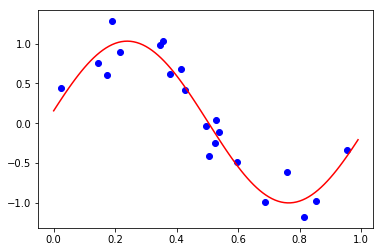

In [62]:
# libraries
from autograd import numpy as np
import matplotlib.pyplot as plt
# import the dataset
csvname = 'datasets/' + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]
w=np.array([0.1*np.random.randn(2,1),0.1*np.random.randn(2,1)])

def model(x,w):
    # feature transformation
    f = feature_transforms(x,w[0])
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:]) 
    return a.T


def feature_transforms(x,w):
    # calculate feature transform
    f = np.sin(w[0] + np.dot(x.T,w[1:])).T 
    return f


def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def least_squares(w):
    cost=np.sum((model(x,w)-y)**2)
    return cost/float(x.size)

weight,cost=gradient_descent(least_squares,0.1,5000,w)



s = np.arange(0, 1, 0.01)
t = np.arange(0, 1, 0.01)
i =0
for j in s:
    t[i] = model(j,weight[-1])
    i = i+1
plt.scatter(x,y,linewidth = 1,color = 'b')
plt.plot(s,t,color = 'r')






















# Exercise 10.2: Modeling population growth

(1, 19)


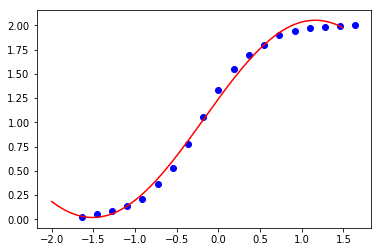

In [142]:
# libraries
from autograd import numpy as np

# import the dataset
csvname = 'datasets/' + 'yeast.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]


#Normalize input
x=(x-np.mean(x))/np.std(x)


w=np.array([0.1*np.random.randn(2,1),0.1*np.random.randn(2,1)])
def model(x,w):
    # feature transformation
    f = feature_transforms(x,w[0])
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:]) 
    return a.T


def feature_transforms(x,w):
    # calculate feature transform
    f = np.sin(w[0] + np.dot(x.T,w[1:])).T 
    return f


def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def least_squares(w):
    cost=np.sum((model(x,w)-y)**2)
    return cost/float(x.size)

weight,cost=gradient_descent(least_squares,0.1,5000,w)
print(model(x,weight[-1]).shape)



s = np.arange(-2, 1.5, 0.01)
t = np.arange(-2, 1.5, 0.01)
i =0

for j in s:
    t[i] = model(j,weight[-1])
    i = i+1
plt.scatter(x,y,linewidth = 1,color = 'b')
plt.plot(s,t,color = 'r')



# Exercise 10.9: A wavy multi-output dataset

In [9]:
# libraries
from autograd import numpy as np

# import the dataset
csvname = 'datasets/' + 'diagonal_stripes.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]

#w=np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0])
w=np.array([1.0,1.0,1.0,1.0])
y = data[-1:,:]


sin1=np.sin(w[0]*x[0,:]+w[1]*x[1,:]+w[2])
print(sin1.shape)
def model(x,w):
    sin1=np.sin(w[0]*x[0,:]+w[1]*x[1,:]+w[2])
    a=w[3]+sin1
    return a.T


def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history


def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w)))) 
    return cost/float(np.size(y))

weight,cost=gradient_descent(softmax,0.02,5000,w)


prediction=[]
result=[]

for i in range(0,300):
    prediction.append(np.sign(model(x,weight[-1])[i]))
    result.append(y[0][i])
    
error=0
for i in range(0,300):
    if result[i]!=prediction[i]:
        error+=1
print(error)
print('The number of misclassification is',error)
print('The accuracy is', 1-error/300)



(300,)
[1.99208043 3.00897444 1.030639   0.09880368]
9
